# Train a deep neural network for an Image classification task using Bean leaf dataset

**Dataset**: <https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset>

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\train\train'
validation_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\validation\validation'
test_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\test\test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)

Found 1034 images belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)

Found 133 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='sparse', shuffle=False
)


Found 128 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),  # Flatten the input (150, 150, 3) to 150*150*3 = 67500
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,

)

Epoch 1/5


33/33 [==============================] - 33s 961ms/step - loss: 16.1338 - accuracy: 0.3298 - val_loss: 3.6737 - val_accuracy: 0.3609
Epoch 2/5
33/33 [==============================] - 37s 1s/step - loss: 2.7962 - accuracy: 0.4062 - val_loss: 1.9970 - val_accuracy: 0.4436
Epoch 3/5
33/33 [==============================] - 33s 990ms/step - loss: 2.1752 - accuracy: 0.4410 - val_loss: 2.3052 - val_accuracy: 0.3383
Epoch 4/5
33/33 [==============================] - 33s 983ms/step - loss: 2.0946 - accuracy: 0.4420 - val_loss: 1.2108 - val_accuracy: 0.5639
Epoch 5/5
33/33 [==============================] - 34s 1s/step - loss: 1.7940 - accuracy: 0.4603 - val_loss: 1.3265 - val_accuracy: 0.4361


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 1s 323ms/step - loss: 1.4692 - accuracy: 0.3438
Test accuracy: 0.34375


In [ ]:
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

5/5 [==============================] - 1s 164ms/step


In [ ]:
class_names = list(test_generator.class_indices.keys())
class_names

['angular_leaf_spot', 'bean_rust', 'healthy']

In [ ]:
y_true = test_generator.classes


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names))


                   precision    recall  f1-score   support

angular_leaf_spot       0.34      0.98      0.51        43
        bean_rust       0.00      0.00      0.00        43
          healthy       0.50      0.05      0.09        42

         accuracy                           0.34       128
        macro avg       0.28      0.34      0.20       128
     weighted avg       0.28      0.34      0.20       128



In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    cm = np.array([[14, 20,  9],
               [ 2, 28, 13],
               [ 0,  1, 41]])

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

[[42  1  0]
 [41  0  2]
 [39  1  2]]


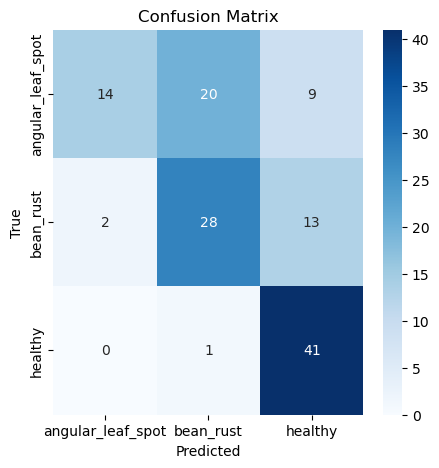

In [ ]:
plot_confusion_matrix(y_true, y_pred, class_names)


In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

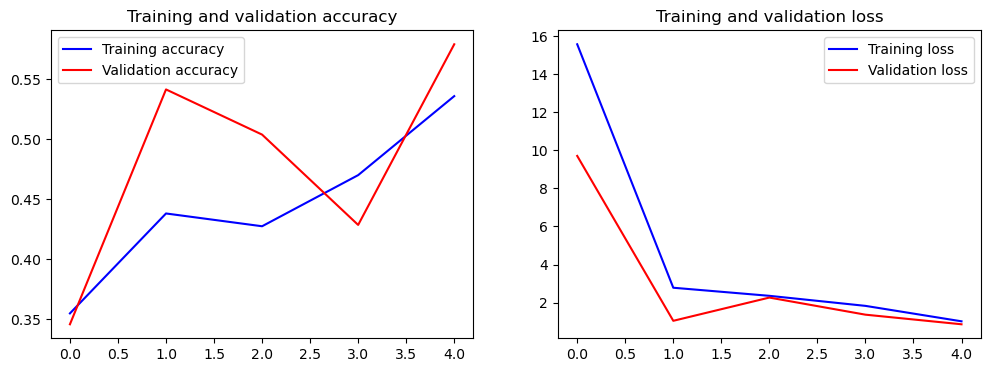

In [ ]:
plot_training_history(history)

In [ ]:
def plot_predictions(generator, model, class_names):
    x, y_true = next(generator)
    y_pred_prob = model.predict(x)
    y_pred = np.argmax(y_pred_prob, axis=1)

    plt.figure(figsize=(20, 10))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x[i])
        plt.title(f'True: {class_names[int(y_true[i])]}, Pred: {class_names[y_pred[i]]}\nProb: {y_pred_prob[i][y_pred[i]]:.2f}')
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 72ms/step


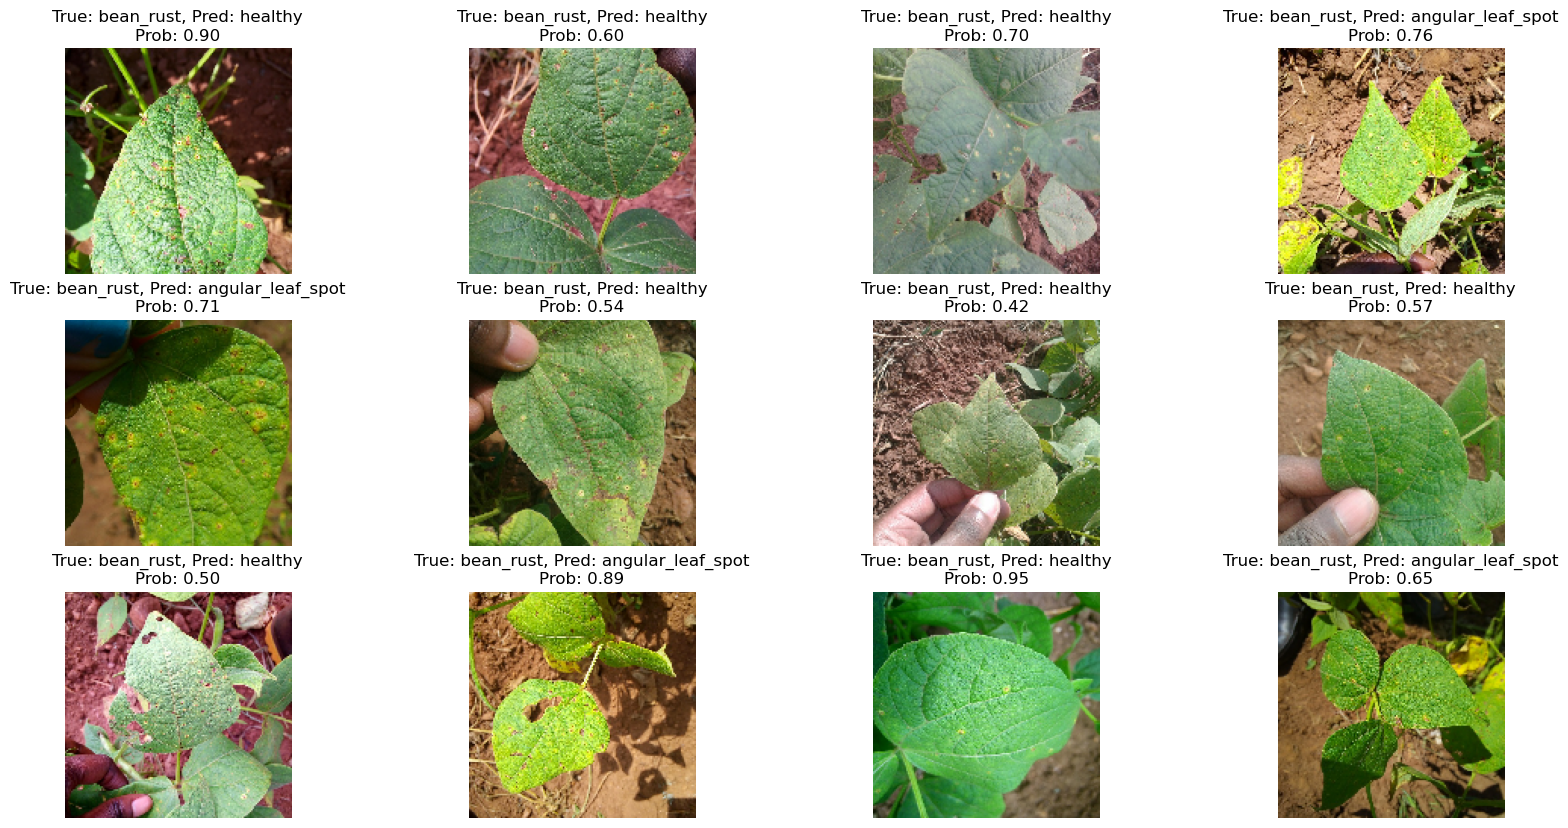

In [ ]:
plot_predictions(test_generator, model, class_names)
